In [1]:
import os
import pickle
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

dataset_code = 'B'
model_name = 'VGG-16'
data_saved_dir = r'D:\My Code\Classification\pickle_data'
train_data_path = os.path.join(data_saved_dir, f'{dataset_code}_training.pkl')
train_images, train_labels = load_pickle(train_data_path)

val_data_path = os.path.join(data_saved_dir, 'validation_data.pkl')
val_images, val_labels = load_pickle(val_data_path)

In [3]:
Vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
model = Sequential()
model.add(Vgg16)

for layer in model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 2048)              67110912  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 81,827,649
Trainable params: 67,112,961
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
history = model.fit(train_images, train_labels, epochs = 50, batch_size = 32, validation_data = (val_images, val_labels))

Epoch 1/50
65/65 [==============================] - 14s 161ms/step - loss: 1.6403 - accuracy: 0.7463 - val_loss: 0.3118 - val_accuracy: 0.8996
Epoch 2/50
65/65 [==============================] - 8s 125ms/step - loss: 0.3527 - accuracy: 0.8830 - val_loss: 0.2299 - val_accuracy: 0.9121
Epoch 3/50
65/65 [==============================] - 8s 126ms/step - loss: 0.1638 - accuracy: 0.9364 - val_loss: 0.3150 - val_accuracy: 0.8996
Epoch 4/50
65/65 [==============================] - 8s 126ms/step - loss: 0.1222 - accuracy: 0.9494 - val_loss: 0.2547 - val_accuracy: 0.9038
Epoch 5/50
65/65 [==============================] - 8s 126ms/step - loss: 0.1369 - accuracy: 0.9413 - val_loss: 0.3416 - val_accuracy: 0.8410
Epoch 6/50
65/65 [==============================] - 8s 126ms/step - loss: 0.0735 - accuracy: 0.9735 - val_loss: 0.2558 - val_accuracy: 0.9079
Epoch 7/50
65/65 [==============================] - 8s 126ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.3012 - val_accuracy: 0.8996
Epoch

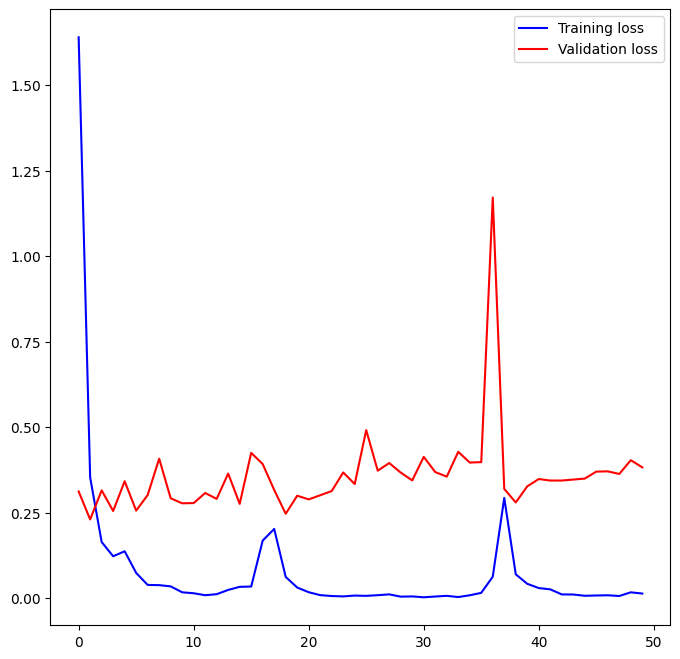

<Figure size 640x480 with 0 Axes>

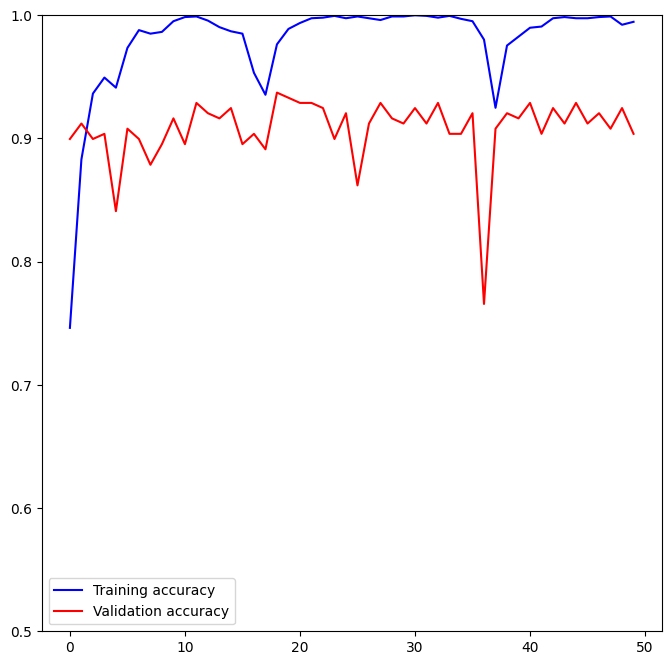

In [5]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.ylim(0.5, 1)
plt.show()

8/8 [==============================] - 2s 240ms/step


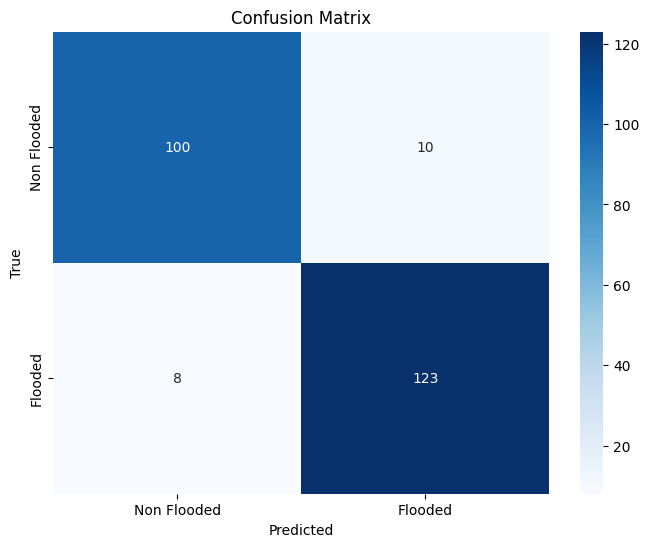

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.92      0.94      0.93       131

    accuracy                           0.93       241
   macro avg       0.93      0.92      0.92       241
weighted avg       0.93      0.93      0.93       241



In [6]:
test_data_path = os.path.join(data_saved_dir, 'test_data.pkl')
test_images, test_labels = load_pickle(test_data_path)

predictions = model.predict(test_images)

predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Flooded', 'Flooded'], yticklabels=['Non Flooded', 'Flooded'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

In [7]:
model_saved = r'D:\My Code\Classification\models'
model.save(os.path.join(model_saved, f'{dataset_code}_{model_name} (256X256).h5'))